In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model, preprocessing
import scipy.stats as sps

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Methods


https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faqhow-are-the-likelihood-ratio-wald-and-lagrange-multiplier-score-tests-different-andor-similar/#:~:text=The%20Wald%20test%20works%20by,are%20simultaneously%20equal%20to%20zero




## Data

In [5]:
g1_count = 100
g2_count = 100

x1 = np.arange(5, 15, 10/g1_count)
y1 = x1 + 3 + np.random.normal(2, 1, g1_count)

x2 = np.arange(0, 10, 10/g2_count)
y2 = 1.1*x2 + 3 + np.random.normal(2, 1, g2_count)

df = pd.DataFrame({"x1": x1, "x2": x2, "y1": y1, "y2": y2})

In [7]:
df

,x1,x2,y1,y2
0,5.0,0.0,11.625367,4.702109
1,5.1,0.1,9.739272,7.235928
2,5.2,0.2,9.449912,7.032900
3,5.3,0.3,10.750875,6.090785
4,5.4,0.4,10.983776,6.399480
...,...,...,...,...
95,14.5,9.5,20.469723,14.590676
96,14.6,9.6,21.116671,14.003531
97,14.7,9.7,20.123385,16.101572
98,14.8,9.8,19.182113,15.468977


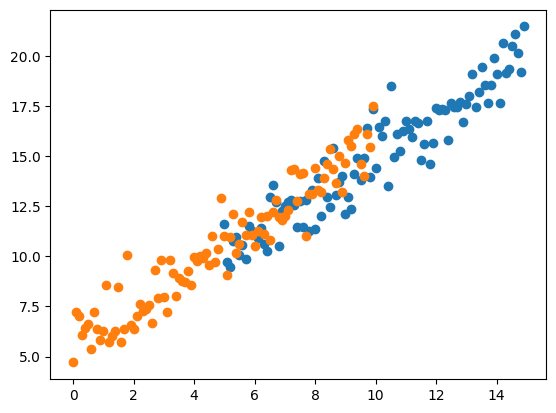

In [8]:
fig, ax = plt.subplots()

ax.scatter(x1,y1)
ax.scatter(x2,y2)

## Linear models

### Seperate Models

#### Scikit-learn model

In [9]:
lm1_sk = linear_model.LinearRegression().fit(x1.reshape(-1,1), y1.reshape(-1,1))
lm2_sk = linear_model.LinearRegression().fit(x2.reshape(-1,1), y2.reshape(-1,1))
print(f" y = {lm1_sk.coef_[0][0]}x + {lm1_sk.intercept_[0]}")
print(f" y = {lm2_sk.coef_[0][0]}x + {lm2_sk.intercept_[0]}")

 y = 0.9981713854604463x + 5.021643120868708
 y = 1.0335232677075439x + 5.429586417235129


#### Statsmodels model

Endog is the dependent variable while exog is the independent variable

In [10]:
x1s = df["x1"]
x2s = df["x2"]

x1s = sm.add_constant(x1s) # add column of ones to include intercept term in model
x2s = sm.add_constant(x2s) # add column of ones to include intercept term in model

lm1_sm = sm.OLS(endog=df["y1"], exog=x1s).fit()
lm2_sm = sm.OLS(endog=df["y2"], exog=x2s).fit()
# lm1 = sm.OLS(endog=df["y1"], exog=df[["x1"]].assign(intercept=1)).fit()
# lm2 = sm.OLS(endog=df["y2"], exog=df[["x2"]].assign(intercept=1)).fit()

In [11]:
lm1_sm.params

const    5.021643
x1       0.998171
dtype: float64

In [12]:
lm1_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     799.3
Date:                Tue, 16 May 2023   Prob (F-statistic):           6.40e-49
Time:                        11:47:18   Log-Likelihood:                -142.78
No. Observations:                 100   AIC:                             289.6
Df Residuals:                      98   BIC:                             294.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0216      0.366     13.728      0.000       4.296       5.748
x1             0.9982      0.035     28.271      0.000       0.928       1.068
==============================================================================
Omnibus:                        1.090   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.580   Jarque-Bera (JB):                0.898
Skew:                           0.232   Prob(JB):                        0.638
Kurtosis:                       2.993   Cond. No.                         37.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
lm2_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     998.5
Date:                Tue, 16 May 2023   Prob (F-statistic):           3.42e-53
Time:                        11:47:18   Log-Likelihood:                -135.13
No. Observations:                 100   AIC:                             274.3
Df Residuals:                      98   BIC:                             279.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4296      0.187     28.971      0.000       5.058       5.802
x2             1.0335      0.033     31.600      0.000       0.969       1.098
==============================================================================
Omnibus:                        4.241   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.120   Jarque-Bera (JB):                3.790
Skew:                           0.472   Prob(JB):                        0.150
Kurtosis:                       3.137   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
lm1_sm.bse

const    0.365786
x1       0.035307
dtype: float64

In [15]:
lm1_sm.pvalues

const    1.469909e-24
x1       6.404973e-49
dtype: float64

#### Statsmodel model 2

In [16]:
lm1_b = smf.ols(formula="y1 ~ x1", data=df).fit()
lm1_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     799.3
Date:                Tue, 16 May 2023   Prob (F-statistic):           6.40e-49
Time:                        11:47:19   Log-Likelihood:                -142.78
No. Observations:                 100   AIC:                             289.6
Df Residuals:                      98   BIC:                             294.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0216      0.366     13.728      0.000       4.296       5.748
x1             0.9982      0.035     28.271      0.000       0.928       1.068
==============================================================================
Omnibus:                        1.090   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.580   Jarque-Bera (JB):                0.898
Skew:                           0.232   Prob(JB):                        0.638
Kurtosis:                       2.993   Cond. No.                         37.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Scipy stats model

In [17]:
lm1_sp = sps.linregress(x=x1, y=y1, alternative='two-sided')
lm2_sp = sps.linregress(x=x2, y=y2, alternative='two-sided')
print(f" y = {lm1_sp.slope}x + {lm1_sp.intercept}")
print(f" y = {lm2_sp.slope}x + {lm2_sp.intercept}")

 y = 0.9981713854604464x + 5.021643120868706
 y = 1.0335232677075445x + 5.429586417235125


### Combined models

# Ancova

http://www.biostathandbook.com/ancova.html

https://web.archive.org/web/20230223045335/http://www.biostathandbook.com/ancova.html

https://www.reneshbedre.com/blog/ancova.html

https://web.archive.org/web/20230201184317/https://www.reneshbedre.com/blog/ancova.html

https://www.statology.org/ancova/



## Application and Assumptions

Used to test for significance between different linear models that include at least one continuous and one categorical independent variable

>Null hypotheses:
>* Slopes of regression lines are all equal
>* Y intercepts of regression lines are all the same/ adjusted means of the group (least squares means) are the same


>Assumptions:
>* Linear relationship between dependent variable and covariate
>* Normally distributed residuals
>* Dependent variable and covariate are continuous
>* No interaction between categorical independent variable and covariate (homogeneity within-group regression slopes)

In [18]:
x_c = np.concatenate((x1, x2))
y_c = np.concatenate((y1, y2))
group_list = np.concatenate((np.array((len(x1)*["A"])),np.array((len(x2)*["B"]))))

df_c = pd.DataFrame({"x": x_c, "y": y_c, "group": group_list})

df_c

,x,y,group
0,5.0,11.625367,A
1,5.1,9.739272,A
2,5.2,9.449912,A
3,5.3,10.750875,A
4,5.4,10.983776,A
...,...,...,...
195,9.5,14.590676,B
196,9.6,14.003531,B
197,9.7,16.101572,B
198,9.8,15.468977,B


In [19]:
ancova = smf.ols('y ~ group + x', data=df_c).fit()

In [20]:
ancova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     1398.
Date:                Tue, 16 May 2023   Prob (F-statistic):          4.15e-117
Time:                        11:47:22   Log-Likelihood:                -278.48
No. Observations:                 200   AIC:                             563.0
Df Residuals:                     197   BIC:                             572.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8458      0.259     18.746      0.000       4.336       5.356
group[T.B]     0.6713      0.184      3.657      0.000       0.309       1.033
x              1.0158      0.024     42.264      0.000       0.968       1.063
==============================================================================
Omnibus:                        3.850   Durbin-Watson:                   2.214
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.674
Skew:                           0.332   Prob(JB):                        0.159
Kurtosis:                       3.028   Cond. No.                         36.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
ancova.pvalues

Intercept      1.131547e-45
group[T.B]     3.274471e-04
x             9.772567e-101
dtype: float64

## Test for normal residuals

In [32]:
resid_ancova = ancova.resid
resid_ancova

0      1.700363
1     -0.287317
2     -0.678262
3      0.521117
4      0.652433
         ...   
195   -0.576956
196   -1.265686
197    0.730771
198   -0.003409
199    1.934511
Length: 200, dtype: float64

(array([ 5., 12., 26., 45., 44., 31., 18., 12.,  4.,  3.]),
 array([-2.33179965, -1.80030077, -1.26880189, -0.73730301, -0.20580413,
         0.32569475,  0.85719363,  1.38869251,  1.92019138,  2.45169026,
         2.98318914]),
 <BarContainer object of 10 artists>)

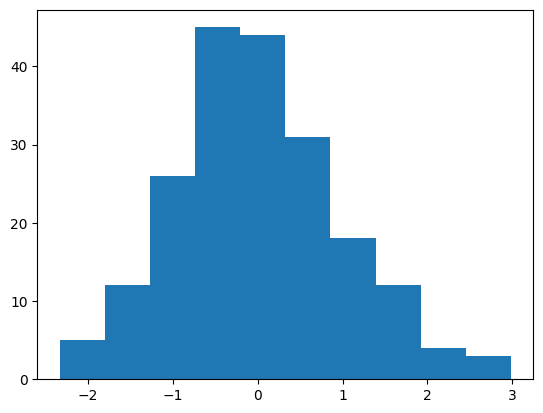

In [30]:
plt.hist(ancova.resid)

In [36]:
test_result_names = ['Jarque-Bera', 'JB_p_value', 'Skew', 'Kurtosis']
jb_test = sm.stats.stattools.jarque_bera(resid_ancova, axis=0)
jb_results = dict(zip(test_result_names, jb_test))
jb_results

{'Jarque-Bera': 3.6742026015486595,
 'JB_p_value': 0.1592784579304781,
 'Skew': 0.3317100974911852,
 'Kurtosis': 3.027891881890485}

In [33]:
sps.shapiro(resid_ancova)

ShapiroResult(statistic=0.9915061593055725, pvalue=0.2929510474205017)

In [35]:
sps.normaltest(resid_ancova)

NormaltestResult(statistic=3.850098994875369, pvalue=0.1458685365587373)

## Test for equal variances between groups

In [39]:
#sps.bartlett(df_c["y"], df_c["group"])

sps.bartlett(df["y1"], df["y2"])

BartlettResult(statistic=0.05572210850387801, pvalue=0.8133897529039456)

# Z statistic

https://www.jstor.org/stable/2782277

https://stats.stackexchange.com/questions/435644/is-there-a-method-to-look-for-significant-difference-between-two-linear-regressi

**Two Sample Z-test**
>Null hypothesis: two population means are equal
>* 
    
>Inputs: 
>* dataset

>Returns: 
>* 

>Assumptions:
>* 


$$z = \frac{(\bar{x_1} - \bar{x_2})}{\sqrt{\sigma_1^2/n_1 + \sigma_2^2/n_2}}$$
Standard error of the sample mean

$$\sigma_{\bar{x}} = \frac{\sigma_x}{\sqrt{n}}$$

Z-statistic for model coefficients
$$z = \frac{(\beta_1 - \beta_2)}{\sqrt{SE_1^2 + SE_2^2}}$$

* $SE$ = standard error

In [ ]:
def zstat_coeff(b1, se1, b2, se2):
    return ((b1-b2)/np.sqrt(se1**2 + se2**2)) 

In [ ]:
b1 = lm1_sm.params[0]
se1 = lm1_sm.bse[0]
b2 = lm2_sm.params[0]
se2 = lm2_sm.bse[0]

In [ ]:
p_value = 2*sps.norm.pdf(-abs(zstat_coeff(b1,se1,b2,se2)))
p_value

In [ ]:
p_value_c = 2*sps.norm.cdf(-abs(zstat_coeff(b1,se1,b2,se2)))
p_value_c

In [ ]:
# p_value = 2*pnorm(-abs(compare.coeff(b1,se1,b2,se2)))
# p_value

# Wald Test

https://en.wikipedia.org/wiki/Wald_test

https://www.statology.org/wald-test-python/

In [ ]:
lm_c = smf.ols("y1 ~ X1 + X2", df).fit()
results.summary()

In [ ]:
results.wald_test_terms()

In [ ]:
# OLSResults.wald_test_terms(skip_single=False, extra_constraints=None, combine_terms=None, scalar=None)

# ols = sm.regression.linear_model.OLS(X,y)
ols = sm.regression.linear_model.OLS("y1 ~ X1 + X2", df)
# ols_res = ols.fit()
# ols_res.wald_test_terms()

#results = smf.ols('mpg ~ disp + carb + hp + cyl', df).fit()
#results.wald_test('(hp = 0, cyl = 0)')

# res_ols = ols("np.log(Days+1) ~ C(Duration, Sum)*C(Weight, Sum)", data).fit()
#res_ols.wald_test_terms()

# F-Test

# T-Test